In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("xy.csv")

In [30]:
df.head(10)

,X,Y
0,36,73
1,60,86


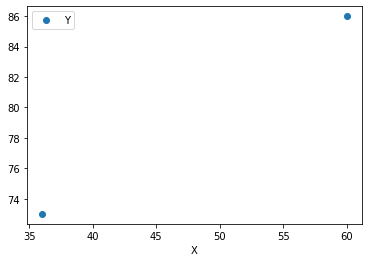

In [31]:
df.plot(x="X",y="Y", style = "o")
plt.show()

In [32]:
df.head()

,X,Y
0,36,73
1,60,86


In [33]:
x_mean = df["X"].mean()
y_mean = df["Y"].mean()
print(x_mean, y_mean)

48.0 79.5


In [34]:
df["x"] = df["X"] - x_mean
df["y"] = df["Y"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,X,Y,x,y,x*y,x^2,y^2
0,36,73,-12.0,-6.5,78.0,144.0,42.25
1,60,86,12.0,6.5,78.0,144.0,42.25


In [35]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

156.0 288.0 84.5


In [36]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation

1.0

In [37]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [38]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

In [39]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

12.0 6.5


In [40]:
m = correlation * (std_deviation_y / std_deviation_x)
m

0.5416666666666666

In [44]:
c = df["Y"].mean() - m * df["X"].mean()
c

53.5

In [45]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)df["y_prediction"] = m * df["X"] + c
df

,X,Y,x,y,x*y,x^2,y^2,y_prediction
0,36,73,-12.0,-6.5,78.0,144.0,42.25,73.0
1,60,86,12.0,6.5,78.0,144.0,42.25,86.0


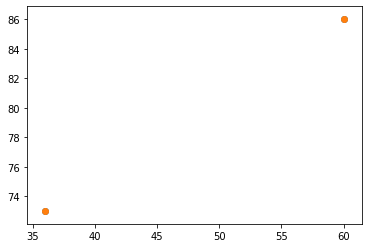

In [46]:
plot1 = plt.scatter(df["X"], df["Y"])
plot2 = plt.scatter(df["X"], df["y_prediction"])
plt.show()